In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndi 
from datetime import datetime
from collections import OrderedDict

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
crime18 = pd.read_csv('boston_crime_2018.csv')
crime20 = pd.read_csv('boston_crime_2020.csv')
crime22 = pd.read_csv('boston_crime_2022.csv')
data = [crime18, crime20, crime22]

/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_51554/1927707022.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime20 = pd.read_csv('boston_crime_2020.csv')
/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_51554/1927707022.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime22 = pd.read_csv('boston_crime_2022.csv')


### Graph 1: Geospatial map of crime in Boston over time

In [4]:
locations = [(year.loc[:, ["Lat", "Long"]]).dropna() for year in data]

In [5]:
max_lat, min_lat = locations[0].iloc[1,0], locations[0].iloc[1,0]
max_long, min_long = locations[0].iloc[1,1], locations[0].iloc[1,1]

for location in locations:
    max_lat = max(max_lat, location.iloc[:, 0].max())
    min_lat = min(min_lat, location.iloc[:, 0].min())
    max_long = max(max_long, location.iloc[:, 1].max())
    min_long = min(min_long, location.iloc[:, 1].min())

print(max_lat, min_lat, max_long, min_long)

42.46141002105424 42.21440996169888 -70.9537263645748 -71.34946994725333


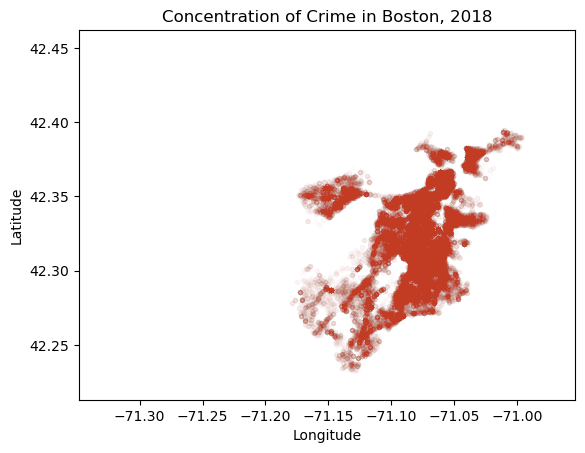

In [6]:
plot = plt.scatter(locations[0].loc[:,"Long"], locations[0].loc[:,"Lat"], c="#c23b23", alpha=0.01, marker=".")
plt.ylim(42.213, 42.462)
plt.xlim(-71.348, -70.954)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2018")
plt.show()

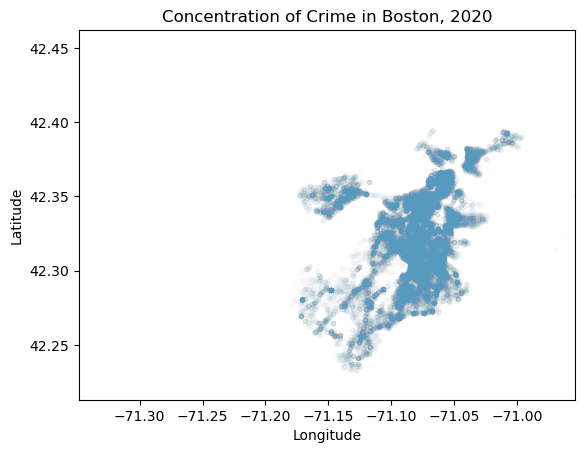

In [7]:
plot = plt.scatter(locations[1].loc[:,"Long"], locations[1].loc[:,"Lat"], c="#579abe", alpha=0.01, marker=".")
plt.ylim(42.213, 42.462)
plt.xlim(-71.348, -70.954)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2020")
plt.show()

Text(0.5, 1.0, 'Concentration of Crime in Boston, 2022')

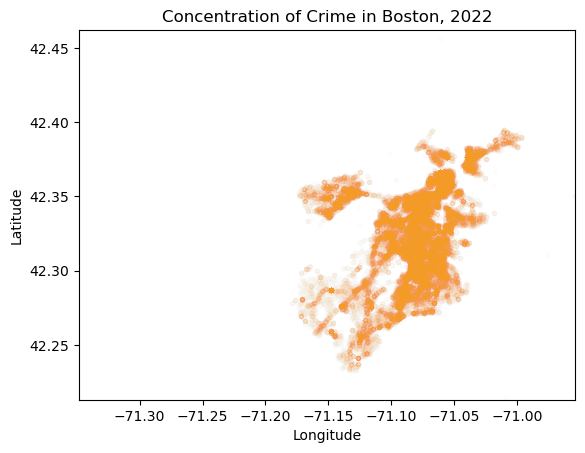

In [8]:
plot = plt.scatter(locations[2].loc[:,"Long"], locations[2].loc[:,"Lat"], c="#f39a27", alpha=0.01, marker=".")
plt.ylim(42.213, 42.462)
plt.xlim(-71.348, -70.954)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2022")

In [9]:
def latitude_map(latitude, longitude, size=1000):
    """Returns the corresponding array indexes (i,j) of the given latitude and longitude"""
    lat_interval = (max_lat - min_lat) / (size - 1)
    long_interval = (max_long - min_long) / (size - 1)
    i = int((size - 1) - (latitude - min_lat) / lat_interval)
    j = int((longitude - min_long) / long_interval)
    return i, j

In [10]:
maps = [np.zeros((1000, 1000))] * 3
for i in range(0, len(maps)):
    for index, row in locations[i].iterrows():
        lat, long = latitude_map(row.loc["Lat"], row.loc["Long"])
        maps[i][lat][long] += 1

In [11]:
extent = [-71.348, -70.954,42.213, 42.462]
aspect = (71.348 - 70.954) / (42.462 - 42.213)

Text(0.5, 1.0, 'Concentration of Crime in Boston, 2018')

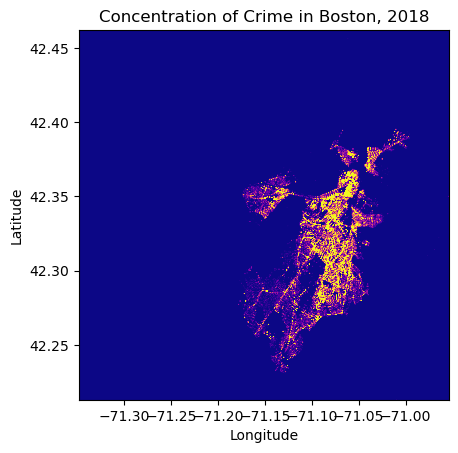

In [12]:
plt.imshow(maps[0], vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2018")

Text(0.5, 1.0, 'Concentration of Crime in Boston, 2020')

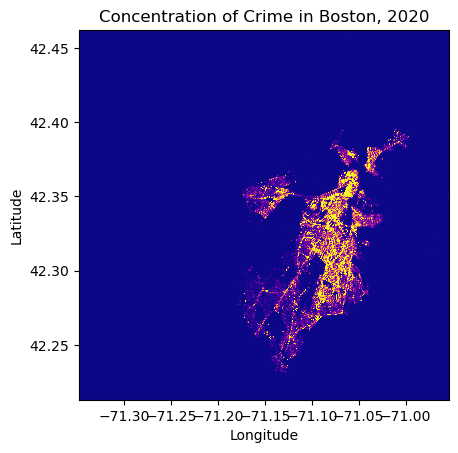

In [13]:
plt.imshow(maps[1], vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2020")

Text(0.5, 1.0, 'Concentration of Crime in Boston, 2022')

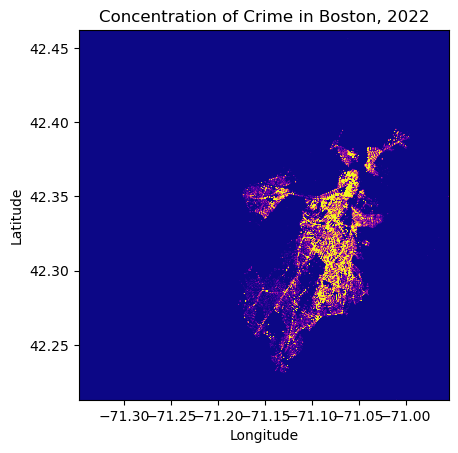

In [14]:
plt.imshow(maps[2], vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concentration of Crime in Boston, 2022")

### Graph 2: Convolution of geospatial map that spacially smoothes the data

In [15]:
def convolve(image, kernel, iter):
    for i in range(iter):
        image = ndi.convolve(image, kernel)
    return image

blur = np.array(
    [[0.1, 0.1, 0.1], 
     [0.1, 0.2, 0.1], 
     [0.1, 0.1, 0.1]])

Text(0.5, 1.0, 'Heatmap of crime in Boston, 2018')

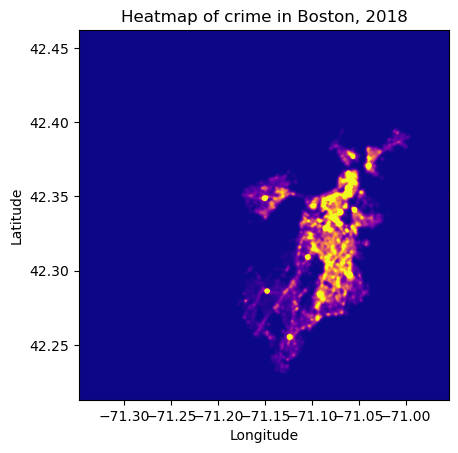

In [16]:
smooth = convolve(maps[0], blur, 15)
plt.imshow(smooth, vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of crime in Boston, 2018")

Text(0.5, 1.0, 'Heatmap of crime in Boston, 2020')

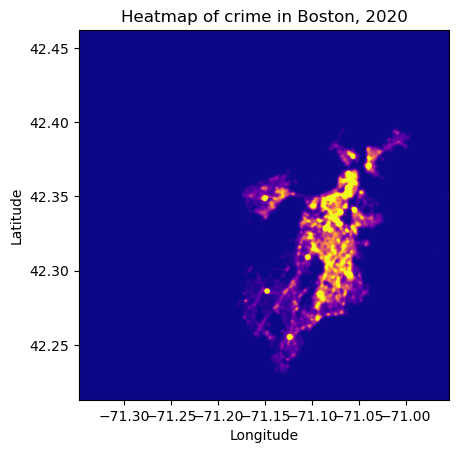

In [17]:
smooth = convolve(maps[1], blur, 15)
plt.imshow(smooth, vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of crime in Boston, 2020")

Text(0.5, 1.0, 'Heatmap of crime in Boston, 2022')

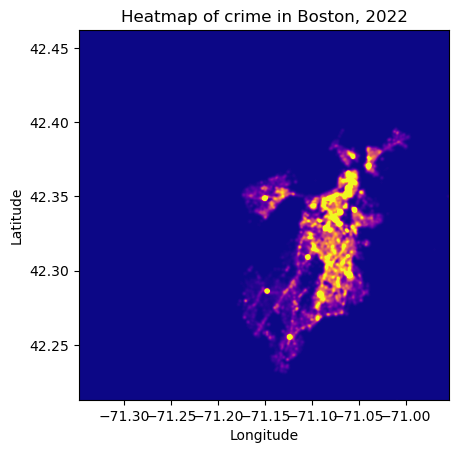

In [18]:
smooth = convolve(maps[2], blur, 15)
plt.imshow(smooth, vmax=5, extent=extent, aspect=aspect, cmap="plasma")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of crime in Boston, 2022")

### Graph 3: Crime patterns throughout the year

In [19]:
date_format = '%Y-%m-%d %H:%M:%S'

dates = [(year.loc[:, ["OCCURRED_ON_DATE"]]).dropna() for year in data]
freqs = [np.zeros((12))] * 3
for i in range(0, len(dates)):
    for index, row in dates[i].iterrows():
        date = datetime.strptime(row.values[0], date_format)
        freqs[i][date.timetuple().tm_mon - 1] += 1

Text(0.5, 1.0, 'Crime as a function of month, 2018')

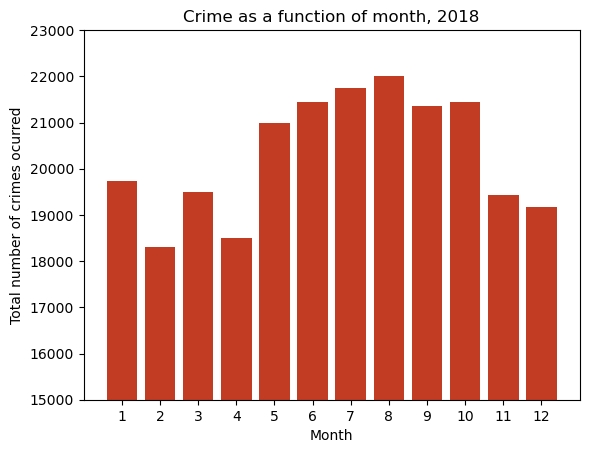

In [20]:
np.arange(1, freqs[0].size + 1)
plt.bar(np.arange(1, freqs[0].size + 1), freqs[0], color ='#c23b23')
plt.xlabel("Month")
plt.ylabel("Total number of crimes ocurred")
plt.xlim(0, 13)
plt.ylim(15000, 23000)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Crime as a function of month, 2018")

Text(0.5, 1.0, 'Crime as a function of month, 2020')

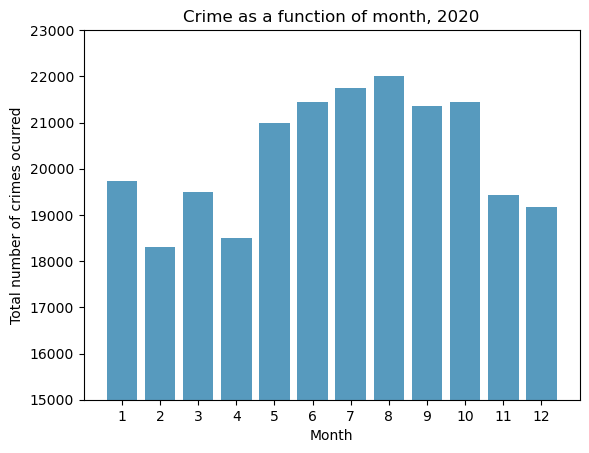

In [21]:
np.arange(1, freqs[1].size + 1)
plt.bar(np.arange(1, freqs[1].size + 1), freqs[1], color ='#579abe')
plt.xlabel("Month")
plt.ylabel("Total number of crimes ocurred")
plt.xlim(0, 13)
plt.ylim(15000, 23000)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Crime as a function of month, 2020")

Text(0.5, 1.0, 'Crime as a function of month, 2020')

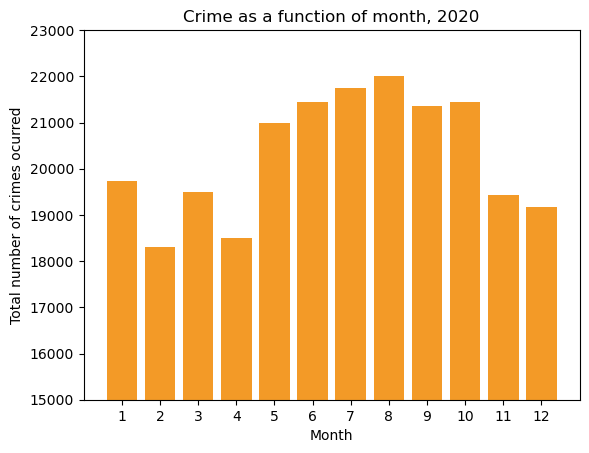

In [22]:
np.arange(1, freqs[2].size + 1)
plt.bar(np.arange(1, freqs[2].size + 1), freqs[2], color ='#f39a27')
plt.xlabel("Month")
plt.ylabel("Total number of crimes ocurred")
plt.xlim(0, 13)
plt.ylim(15000, 23000)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Crime as a function of month, 2020")

### Graph 4: Total crime and its composition by offence description

For this analysis, the unique values from the column "OFFENSE_DESCRIPTION" were extracted, and the descriptions were manually categorized into broader crime categories. 

Crimes with lesser frequency were not included in the chart for clarity. I recognize that the categories are broad and subjective. However, as the intent of this analysis is to provide a general overlook of crime patterns and composition of crime, I believe that omitting some details is appropriate. 

In [23]:
major = OrderedDict({
    'Automobile':['M/V', 'LICENSE', 'VAL', 'OPERATING UNDER THE INFLUENCE', 'MOTOR'],
    'Disorderly Conduct':['DISORDERLY', 'VERBAL DISPUTE', 'DISTURBING'],
    'Robbery':['LARCENY', 'BURGLARY', 'THEFT', 'ROBBERY'],
    'Substance':['DRUGS','ALCOHOL', 'LIQUOR'],
    'Harassment': ['HARASSMENT'],
    'Fraud': ['FRAUD', 'EMBEZZLEMENT', 'FORGERY'],
    'Trespassing':['TRESPASSING'],
    'Property':['PROPERTY'],
    'Vandalism':['VANDALISM'],
    'Threats':['THREATS'],
    'Assault':['ASSAULT'],
    'Arrest':['ARREST'],
    'Fire':['FIRE', 'ARSON'],
    'Violation of Restraining Order':['RESTRAINING ORDER'],
    'Firearm':['WEAPON', 'FIREARM'],
    'Prostitution':['PROSTITUTION'],
    'Fugitive':['FUGITIVE','PRISONER', 'RUNAWAY'],
    'Kidnapping': ['KIDNAPPING', 'TRAFFICKING'],
    'Child Endangerment': ['CHILD', 'MINOR'],
    'Explosives': ['EXPLOSIVES', 'BOMB'],
    'Murder/Manslaughter': ['MURDER','MANSLAUGHTER']
})

counter = [dict.fromkeys(major, 0), dict.fromkeys(major, 0), dict.fromkeys(major, 0)]
descriptions = [(year.loc[:, ["OFFENSE_DESCRIPTION"]]).dropna() for year in data]

for index, row in descriptions[0].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[0][key] += 1

for index, row in descriptions[1].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[1][key] += 1

for index, row in descriptions[2].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[2][key] += 1

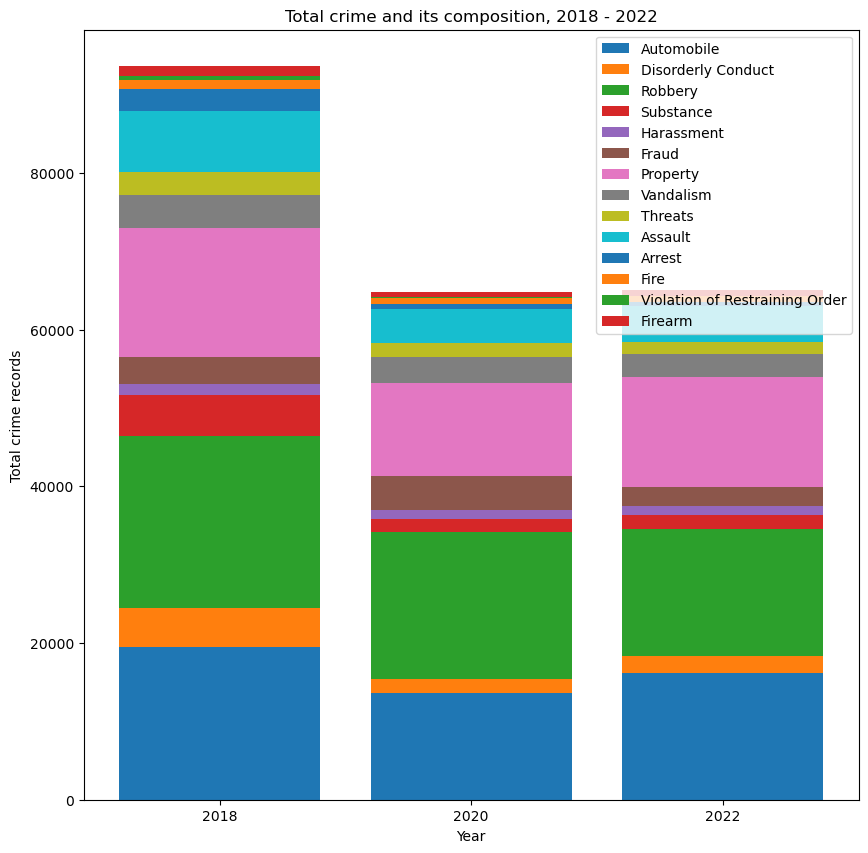

In [27]:
categories = ["2018", "2020", "2022"]

weight_counts = dict.fromkeys(major, np.array(3))

bottom = np.zeros(3)

for key, value in major.items():
    weight_counts[key] = np.array([counter[0][key], counter[1][key], counter[2][key]])

fig, ax = plt.subplots(figsize=(10, 10))

for cat, weight_count in weight_counts.items():
    p = ax.bar(categories, weight_count, 0.8, label=cat, bottom=bottom)
    bottom += weight_count

ax.set_title("Total crime and its composition, 2018 - 2022")
ax.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Total crime records")
plt.show()

Cleaning up the bars by erasing the smaller categories of crime for a cleaner visualization.

In [25]:
major = OrderedDict({
    'Automobile':['M/V', 'LICENSE', 'VAL', 'OPERATING UNDER THE INFLUENCE', 'MOTOR'],
    'Disorderly Conduct':['DISORDERLY', 'VERBAL DISPUTE', 'DISTURBING'],
    'Robbery':['LARCENY', 'BURGLARY', 'THEFT', 'ROBBERY'],
    'Substance':['DRUGS','ALCOHOL', 'LIQUOR'],
    'Harassment': ['HARASSMENT'],
    'Fraud': ['FRAUD', 'EMBEZZLEMENT', 'FORGERY'],
    'Property':['PROPERTY'],
    'Vandalism':['VANDALISM'],
    'Threats':['THREATS'],
    'Assault':['ASSAULT'],
    'Arrest':['ARREST'],
    'Fire':['FIRE', 'ARSON'],
    'Violation of Restraining Order':['RESTRAINING ORDER'],
    'Firearm':['WEAPON', 'FIREARM'],
})

counter = [dict.fromkeys(major, 0), dict.fromkeys(major, 0), dict.fromkeys(major, 0)]
descriptions = [(year.loc[:, ["OFFENSE_DESCRIPTION"]]).dropna() for year in data]

for index, row in descriptions[0].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[0][key] += 1

for index, row in descriptions[1].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[1][key] += 1

for index, row in descriptions[2].iterrows():
    for key, value in major.items():
        for v in value:
            if v in row.values[0]:
                counter[2][key] += 1

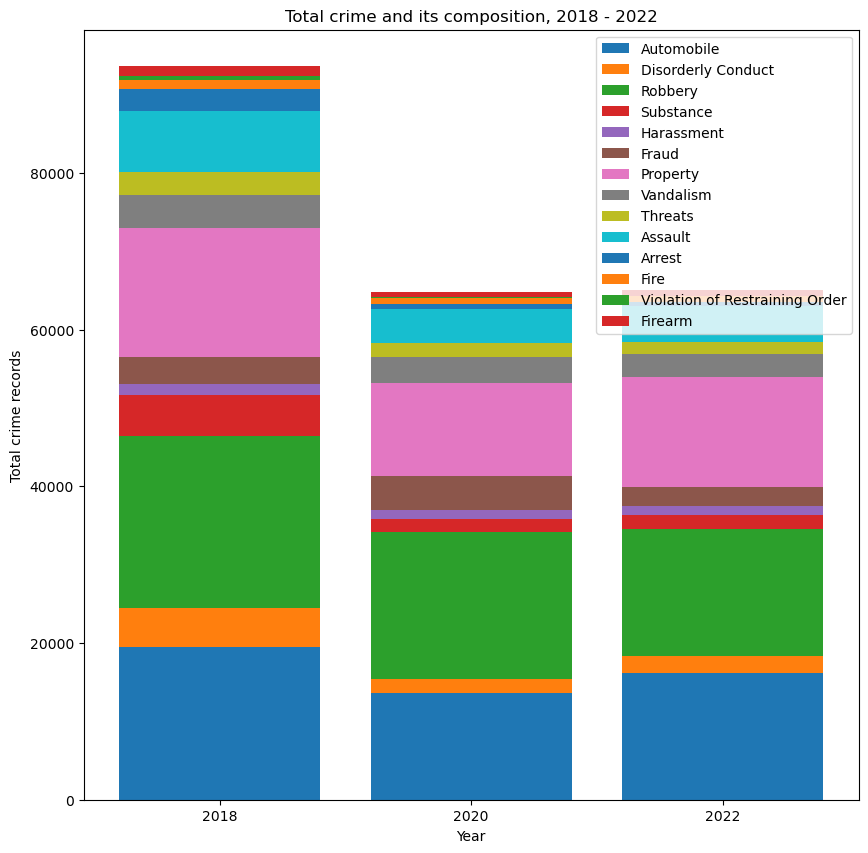

In [26]:
categories = ["2018", "2020", "2022"]

weight_counts = dict.fromkeys(major, np.array(3))

bottom = np.zeros(3)

for key, value in major.items():
    weight_counts[key] = np.array([counter[0][key], counter[1][key], counter[2][key]])

fig, ax = plt.subplots(figsize=(10, 10))

for cat, weight_count in weight_counts.items():
    p = ax.bar(categories, weight_count, 0.8, label=cat, bottom=bottom)
    bottom += weight_count

ax.set_title("Total crime and its composition, 2018 - 2022")
ax.legend(loc="upper right")
plt.xlabel("Year")
plt.ylabel("Total crime records")
plt.show()